<a href="https://colab.research.google.com/github/jashwanthikaa/Chemicals-in-Cosmetics/blob/master/Chemicals_in_Cosmetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chemicals in Cosmetics**

*   **Data Description:** This dataset by the California Safe Cosmetics Program (CSCP) provides hazardous chemicals in cosmetics sold in California. It points to ingredients known to cause cancer, birth defects, or reproductive harm. Any company whose annual sales exceed $1 million has to report these products; some may not have been reported because of non-compliance.

*   **Solution:** The dataset analysis under this project provides the trend of hazardous chemicals found in cosmetics. Key risk visualizations and statistical insights are provided on patterns observed. These findings aim at enhancing the awareness of the public to meet safety regulations better.



In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# 1. Loading and Exploring Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Load datasets

# Chemicals dataset provides information on hazardous chemicals in cosmetics
chemicals_df = pd.read_csv('/content/drive/MyDrive/Freeform Assessment Solution/chemicals-in-cosmetics-.csv')

# Categories dataset describes product categories
categories_df = pd.read_excel('/content/drive/MyDrive/Freeform Assessment Solution/chemicalsincosmetics-dd-subcategories.xlsx')

In [32]:
#Summarizing the Data(chemicals_df)
#Check structure and data types and Display

print("Basic Summary of Chemicals Data:")
chemicals_df.info()
chemicals_df

Basic Summary of Chemicals Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  

CDPHId                                        ProductName    CSFId  \
0            2   ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES      NaN   
1            3                         Glover's Medicated Shampoo      NaN   
2            3                         Glover's Medicated Shampoo      NaN   
3            4           PRECISION GLIMMER EYE LINER-ALL SHADES �      NaN   
4            5        AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �      NaN   
...        ...                                                ...      ...   
114630   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65001.0   
114631   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65002.0   
114632   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65003.0   
114633   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65004.0   
114634   41524  OLD SPICE GENTLEMENS BLEND ALOE AND WILD SAGE ...      NaN   

                 CSF  CompanyId                   CompanyName  BrandName  \
0                NaN          4                  New Avon LLC       AVON   
1                NaN        338           J. Strickland & Co.   Glover's   
2                NaN        338           J. Strickland & Co.   Glover's   
3                NaN          4                  New Avon LLC       AVON   
4                NaN          4                  New Avon LLC       AVON   
...              ...        ...                           ...        ...   
114630     Rosa Soft       1259               Yanbal USA, Inc     YANBAL   
114631  Malva Spirit       1259               Yanbal USA, Inc     YANBAL   
114632  Rojo Fashion       1259               Yanbal USA, Inc     YANBAL   
114633  Terra Mystic       1259               Yanbal USA, Inc     YANBAL   
114634           NaN         86  The Procter & Gamble Company  Old Spice   

        PrimaryCategoryId                    PrimaryCategory  SubCategoryId  \
0                      44    Makeup Products (non-permanent)             53   
1                      18  Hair Care Products (non-coloring)             25   
2                      18  Hair Care Products (non-coloring)             25   
3                      44    Makeup Products (non-permanent)             46   
4                      44    Makeup Products (non-permanent)             52   
...                   ...                                ...            ...   
114630                 44    Makeup Products (non-permanent)             53   
114631                 44    Makeup Products (non-permanent)             53   
114632                 44    Makeup Products (non-permanent)             53   
114633                 44    Makeup Products (non-permanent)             53   
114634                  6                      Bath Products            159   

        ...   CasNumber  ChemicalId            ChemicalName  \
0       ...  13463-67-7           6        Titanium dioxide   
1       ...  65996-92-1           4  Distillates (coal tar)   
2       ...    140-67-0           5               Estragole   
3       ...  13463-67-7           7        Titanium dioxide   
4       ...  13463-67-7           8        Titanium dioxide   
...     ...         ...         ...                     ...   
114630  ...  13463-67-7       68059        Titanium dioxide   
114631  ...  13463-67-7       68060        Titanium dioxide   
114632  ...  13463-67-7       68061        Titanium dioxide   
114633  ...  13463-67-7       68062        Titanium dioxide   
114634  ...  13463-67-7       68074        Titanium dioxide   

        InitialDateReported MostRecentDateReported DiscontinuedDate  \
0                06/17/2009             08/28/2013       02/01/2011   
1                07/01/2009             07/01/2009              NaN   
2                07/01/2009             07/01/2009              NaN   
3                07/09/2009             08/28/2013              NaN   
4                07/09/2009             08/28/2013       02/01/2011   
...                     ..

In [33]:
#Summarizing the Data(categories_df)

#Check structure and data types and Display

print("Basic Summary of Categories Data:")
categories_df.info()
categories_df

Basic Summary of Categories Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Primary Category  13 non-null     object
 1   SubCategory       13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


Primary Category  \
0                       Baby Products   
1                       Bath Products   
2                          Fragrances   
3   Hair Care Products (non-coloring)   
4              Hair Coloring Products   
5     Makeup Products (non-permanent)   
6                       Nail Products   
7               Oral Hygiene Products   
8              Personal Care Products   
9                    Shaving Products   
10                 Skin Care Products   
11               Sun-Related Products   
12       Tattoos and Permanent Makeup   

                                          SubCategory  
0   Baby Shampoos, Baby Skin Care, Baby Wash/Soap,...  
1   Bath Additives, Body Washes and Soaps, Bubble ...  
2   Cologne, Perfumes - Oils and Lotions, Perfumes...  
3   Hair Conditioners (leave-in), Hair Conditioner...  
4   Hair Bleaches, Hair Color Sprays (aerosol), Ha...  
5   Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils,...  
6   Artificial Nails and Related Products, Basecoa...  
7   Mouthwashes and Breath Fresheners, Teeth Clean...  
8   Antiperspirants (making a cosmetic claim), Dou...  
9   Aftershave Products, Shaving Cream and other B...  
10  Acne Products (making a cosmetic claim), Anti-...  
11  Indoor Tanning Products, Sunscreen (making a c...  
12                        Tattoos and Permanent Makup

In [34]:
# Checking for missing values

print("Missing values in Chemicals Data:")
chemicals_df.isnull().sum()

Missing values in Chemicals Data:


CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34398
CompanyId                      0
CompanyName                    0
BrandName                    227
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [35]:
# 2. Data Cleaning and Transformation
# Handling Missing Values
def handle_missing_values(df, strategy_dict):
    """Handles missing values in a DataFrame based on the given strategy."""
    for column, strategy in strategy_dict.items():
        if strategy == 'median':              # Using median for numerical data ensures robustness against outliers
            df[column] = df[column].fillna(df[column].median())
        elif strategy == 'placeholder':
            df[column] = df[column].fillna('Unknown')   # Using 'Unknown' for categorical data preserves interpretability
    return df

chemicals_df = handle_missing_values(chemicals_df, {
    'ChemicalCount': 'median',
    'ProductName': 'placeholder'
})

# Merging Datasets
def merge_datasets(chemicals, categories):
    """Merges chemicals and categories datasets on the shared key."""
    merged = pd.merge(chemicals, categories, how='left', left_on='PrimaryCategory', right_on='Primary Category')
    return merged

merged_data = merge_datasets(chemicals_df, categories_df)

# Remove Duplicates
def remove_duplicates(df):
    """Removes duplicate rows from the DataFrame."""
    return df.drop_duplicates()

merged_data = remove_duplicates(merged_data)
merged_data

CDPHId                                        ProductName    CSFId  \
0            2   ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES      NaN   
1            3                         Glover's Medicated Shampoo      NaN   
2            3                         Glover's Medicated Shampoo      NaN   
3            4           PRECISION GLIMMER EYE LINER-ALL SHADES �      NaN   
4            5        AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �      NaN   
...        ...                                                ...      ...   
114630   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65001.0   
114631   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65002.0   
114632   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65003.0   
114633   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65004.0   
114634   41524  OLD SPICE GENTLEMENS BLEND ALOE AND WILD SAGE ...      NaN   

                 CSF  CompanyId                   CompanyName  BrandName  \
0                NaN          4                  New Avon LLC       AVON   
1                NaN        338           J. Strickland & Co.   Glover's   
2                NaN        338           J. Strickland & Co.   Glover's   
3                NaN          4                  New Avon LLC       AVON   
4                NaN          4                  New Avon LLC       AVON   
...              ...        ...                           ...        ...   
114630     Rosa Soft       1259               Yanbal USA, Inc     YANBAL   
114631  Malva Spirit       1259               Yanbal USA, Inc     YANBAL   
114632  Rojo Fashion       1259               Yanbal USA, Inc     YANBAL   
114633  Terra Mystic       1259               Yanbal USA, Inc     YANBAL   
114634           NaN         86  The Procter & Gamble Company  Old Spice   

        PrimaryCategoryId                    PrimaryCategory  SubCategoryId  \
0                      44    Makeup Products (non-permanent)             53   
1                      18  Hair Care Products (non-coloring)             25   
2                      18  Hair Care Products (non-coloring)             25   
3                      44    Makeup Products (non-permanent)             46   
4                      44    Makeup Products (non-permanent)             52   
...                   ...                                ...            ...   
114630                 44    Makeup Products (non-permanent)             53   
114631                 44    Makeup Products (non-permanent)             53   
114632                 44    Makeup Products (non-permanent)             53   
114633                 44    Makeup Products (non-permanent)             53   
114634                  6                      Bath Products            159   

        ...            ChemicalName  InitialDateReported  \
0       ...        Titanium dioxide           06/17/2009   
1       ...  Distillates (coal tar)           07/01/2009   
2       ...               Estragole           07/01/2009   
3       ...        Titanium dioxide           07/09/2009   
4       ...        Titanium dioxide           07/09/2009   
...     ...                     ...                  ...   
114630  ...        Titanium dioxide           06/19/2020   
114631  ...        Titanium dioxide           06/19/2020   
114632  ...        Titanium dioxide           06/19/2020   
114633  ...        Titanium dioxide           06/19/2020   
114634  ...        Titanium dioxide           06/23/2020   

       MostRecentDateReported  DiscontinuedDate ChemicalCreatedAt  \
0                  08/28/2013        02/01/2011        07/09/2009   
1                  07/01/2009               NaN        07/01/2009   
2                  07/01/2009               NaN        07/02/2009   
3                  08/28/2013               NaN        07/09/2009   
4                  08/28/2013        02/01/2011        07/09/2009   
...                       ...               ...               ...   
11463

In [36]:
# Add chemical count per category
chemical_count_per_category = merged_data.groupby('PrimaryCategory')['ChemicalName'].count().reset_index()
chemical_count_per_category.rename(columns={'ChemicalName': 'ChemicalCount'}, inplace=True)
merged_data = pd.merge(merged_data, chemical_count_per_category, how='left', on='PrimaryCategory')

# Display the first few rows
merged_data.head()

CDPHId                                       ProductName  CSFId  CSF  \
0       2  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES    NaN  NaN   
1       3                        Glover's Medicated Shampoo    NaN  NaN   
2       3                        Glover's Medicated Shampoo    NaN  NaN   
3       4          PRECISION GLIMMER EYE LINER-ALL SHADES �    NaN  NaN   
4       5       AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �    NaN  NaN   

   CompanyId          CompanyName BrandName  PrimaryCategoryId  \
0          4         New Avon LLC      AVON                 44   
1        338  J. Strickland & Co.  Glover's                 18   
2        338  J. Strickland & Co.  Glover's                 18   
3          4         New Avon LLC      AVON                 44   
4          4         New Avon LLC      AVON                 44   

                     PrimaryCategory  SubCategoryId  ... InitialDateReported  \
0    Makeup Products (non-permanent)             53  ...          06/17/2009   
1  Hair Care Products (non-coloring)             25  ...          07/01/2009   
2  Hair Care Products (non-coloring)             25  ...          07/01/2009   
3    Makeup Products (non-permanent)             46  ...          07/09/2009   
4    Makeup Products (non-permanent)             52  ...          07/09/2009   

   MostRecentDateReported DiscontinuedDate  ChemicalCreatedAt  \
0              08/28/2013       02/01/2011         07/09/2009   
1              07/01/2009              NaN         07/01/2009   
2              07/01/2009              NaN         07/02/2009   
3              08/28/2013              NaN         07/09/2009   
4              08/28/2013       02/01/2011         07/09/2009   

  ChemicalUpdatedAt ChemicalDateRemoved ChemicalCount_x  \
0        07/09/2009                 NaN               1   
1        07/01/2009                 NaN               2   
2        07/02/2009                 NaN               2   
3        07/09/2009                 NaN               1   
4        07/09/2009                 NaN               1   

                    Primary Category  \
0    Makeup Products (non-permanent)   
1  Hair Care Products (non-coloring)   
2  Hair Care Products (non-coloring)   
3    Makeup Products (non-permanent)   
4    Makeup Products (non-permanent)   

                                       SubCategory_y ChemicalCount_y  
0  Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils,...           75822  
1  Hair Conditioners (leave-in), Hair Conditioner...            1566  
2  Hair Conditioners (leave-in), Hair Conditioner...            1566  
3  Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils,...           75822  
4  Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils,...           75822  

[5 rows x 25 columns]

In [37]:
# Save the Cleaned Data
cleaned_data = remove_duplicates(merged_data)

cleaned_data.to_csv('cleaned_chemicals_data.csv', index=False)
chemcos = pd.read_csv('/content/cleaned_chemicals_data.csv')

chemcos

CDPHId                                        ProductName    CSFId  \
0            2   ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES      NaN   
1            3                         Glover's Medicated Shampoo      NaN   
2            3                         Glover's Medicated Shampoo      NaN   
3            4           PRECISION GLIMMER EYE LINER-ALL SHADES �      NaN   
4            5        AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �      NaN   
...        ...                                                ...      ...   
114376   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65001.0   
114377   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65002.0   
114378   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65003.0   
114379   41523               HYDRA-LIP TRANSLUCENT COLOR LIPSTICK  65004.0   
114380   41524  OLD SPICE GENTLEMENS BLEND ALOE AND WILD SAGE ...      NaN   

                 CSF  CompanyId                   CompanyName  BrandName  \
0                NaN          4                  New Avon LLC       AVON   
1                NaN        338           J. Strickland & Co.   Glover's   
2                NaN        338           J. Strickland & Co.   Glover's   
3                NaN          4                  New Avon LLC       AVON   
4                NaN          4                  New Avon LLC       AVON   
...              ...        ...                           ...        ...   
114376     Rosa Soft       1259               Yanbal USA, Inc     YANBAL   
114377  Malva Spirit       1259               Yanbal USA, Inc     YANBAL   
114378  Rojo Fashion       1259               Yanbal USA, Inc     YANBAL   
114379  Terra Mystic       1259               Yanbal USA, Inc     YANBAL   
114380           NaN         86  The Procter & Gamble Company  Old Spice   

        PrimaryCategoryId                    PrimaryCategory  SubCategoryId  \
0                      44    Makeup Products (non-permanent)             53   
1                      18  Hair Care Products (non-coloring)             25   
2                      18  Hair Care Products (non-coloring)             25   
3                      44    Makeup Products (non-permanent)             46   
4                      44    Makeup Products (non-permanent)             52   
...                   ...                                ...            ...   
114376                 44    Makeup Products (non-permanent)             53   
114377                 44    Makeup Products (non-permanent)             53   
114378                 44    Makeup Products (non-permanent)             53   
114379                 44    Makeup Products (non-permanent)             53   
114380                  6                      Bath Products            159   

        ... InitialDateReported  MostRecentDateReported DiscontinuedDate  \
0       ...          06/17/2009              08/28/2013       02/01/2011   
1       ...          07/01/2009              07/01/2009              NaN   
2       ...          07/01/2009              07/01/2009              NaN   
3       ...          07/09/2009              08/28/2013              NaN   
4       ...          07/09/2009              08/28/2013       02/01/2011   
...     ...                 ...                     ...              ...   
114376  ...          06/19/2020              06/19/2020              NaN   
114377  ...          06/19/2020              06/19/2020              NaN   
114378  ...          06/19/2020              06/19/2020              NaN   
114379  ...          06/19/2020              06/19/2020              NaN   
114380  ...          06/23/2020              06/23/2020              NaN   

        ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0              07/09/2009        07/09/2009                 NaN   
1              07/01/2009        07/01/2009                 NaN   
2              07/02/2009        07/02/2009                 NaN   
3              07/09/2009   

In [38]:
# Summarize Statitics
print("Summary statistics for numerical columns:")
chemcos.describe()

Summary statistics for numerical columns:


CDPHId         CSFId      CompanyId  PrimaryCategoryId  \
count  114381.000000  80650.000000  114381.000000      114381.000000   
mean    20338.029332  32608.714234     451.186867          51.125650   
std     12481.325794  19090.706365     409.713958          20.464907   
min         2.000000      1.000000       4.000000           1.000000   
25%      8791.000000  15788.000000      86.000000          44.000000   
50%     20910.000000  32542.000000     298.000000          44.000000   
75%     31380.000000  48720.750000     798.000000          59.000000   
max     41524.000000  65009.000000    1391.000000         111.000000   

       SubCategoryId          CasId     ChemicalId  ChemicalCount_x  \
count  114381.000000  114381.000000  114381.000000    114381.000000   
mean       66.885759     673.150628   32909.635368         1.288982   
std        35.817799     148.019920   20403.732357         0.636974   
min         3.000000       2.000000       0.000000         0.000000   
25%        48.000000     656.000000   14092.000000         1.000000   
50%        52.000000     656.000000   32114.000000         1.000000   
75%        65.000000     656.000000   51641.000000         1.000000   
max       172.000000    1242.000000   68074.000000         9.000000   

       ChemicalCount_y  
count    114381.000000  
mean      53237.667646  
std       31840.281768  
min          49.000000  
25%       15347.000000  
50%       75822.000000  
75%       75822.000000  
max       75822.000000

In [39]:
#Chemical Count by Company
chemical_by_Company = (
    merged_data.groupby('CompanyName')['ChemicalName']
    .count()
    .reset_index()
    .rename(columns={'ChemicalName': 'ChemicalCount'})
    .sort_values(by='ChemicalCount', ascending=False)
)
print("Top 10 Chemical Count by Company")
chemical_by_Company.head(10)

Top 10 Chemical Count by Company


CompanyName  ChemicalCount
286                          L'Oreal USA           5747
463                                   S+           5165
128                                 Coty           5162
453  Revlon Consumer Product Corporation           4341
55          Bare Escentuals Beauty, Inc.           3828
527         The Procter & Gamble Company           3535
358                NYX Los Angeles, Inc.           3227
110         Charlotte Tilbury Beauty Ltd           2768
512                      Tarte Cosmetics           2497
563             Victoria's Secret Beauty           2219

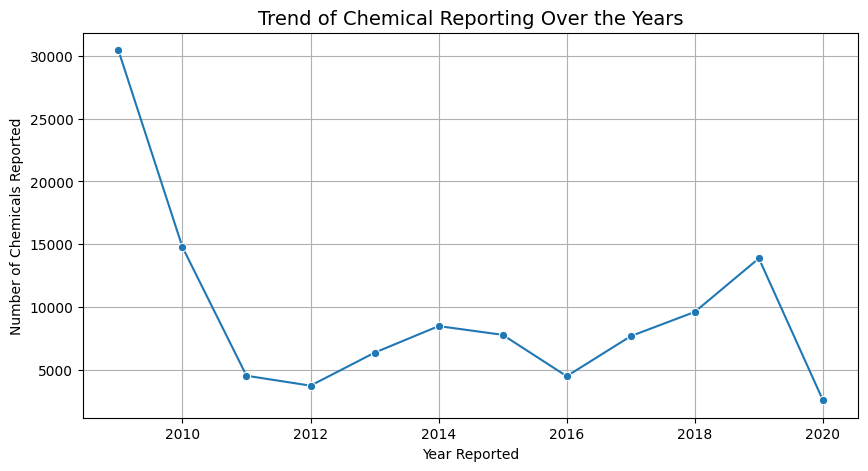

'\n"The line plot shows the trend of hazardous chemicals reported over the years. "\n"There is a noticeable increase in the number of chemicals reported after 2010, "\n"peaking in certain years. This indicates heightened awareness or stricter compliance reporting."\n'

In [40]:
# 3. Data Visualization
# Line plot: Trend of Chemical Reporting Over the Years

def plot_trend(data):
    """Plots the trend of chemical reporting over the years."""
    data['InitialDateReported'] = pd.to_datetime(data['InitialDateReported'], errors='coerce')
    data['YearReported'] = data['InitialDateReported'].dt.year
    trend_data = data.groupby('YearReported')['ChemicalName'].count().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=trend_data, x='YearReported', y='ChemicalName', marker='o')
    plt.title("Trend of Chemical Reporting Over the Years", fontsize=14)
    plt.xlabel("Year Reported")
    plt.ylabel("Number of Chemicals Reported")
    plt.grid(True)
    plt.show()

plot_trend(chemcos)

'''
"The line plot shows the trend of hazardous chemicals reported over the years. "
"There is a noticeable increase in the number of chemicals reported after 2010, "
"peaking in certain years. This indicates heightened awareness or stricter compliance reporting."
'''

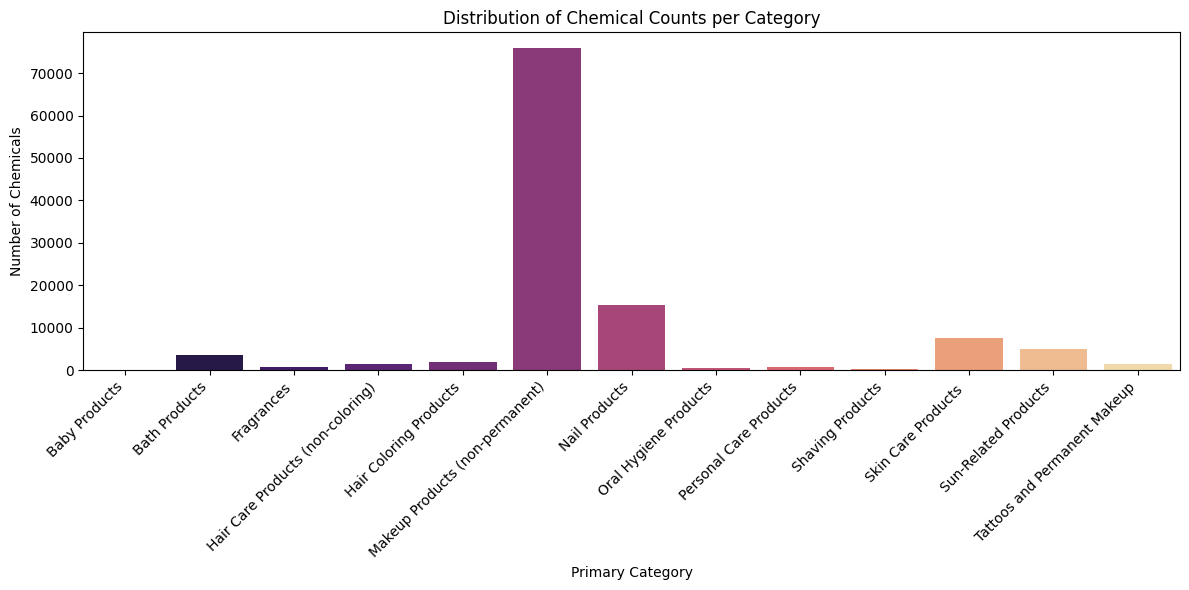

'\n"The bar plot highlights the distribution of hazardous chemicals across primary categories. "\n"Certain categories, such as \'Hair Products\' and \'Skincare\', have significantly higher counts, "\n"indicating they may pose greater risks."\n'

In [41]:
# Bar plot: Distribution of Chemical Counts per Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='PrimaryCategory',
    y='ChemicalCount',
    hue='PrimaryCategory',
    data=chemical_count_per_category,
    palette='magma',
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Chemical Counts per Category')
plt.xlabel('Primary Category')
plt.ylabel('Number of Chemicals')
plt.tight_layout()
plt.show()

'''
"The bar plot highlights the distribution of hazardous chemicals across primary categories. "
"Certain categories, such as 'Hair Products' and 'Skincare', have significantly higher counts, "
"indicating they may pose greater risks."
'''

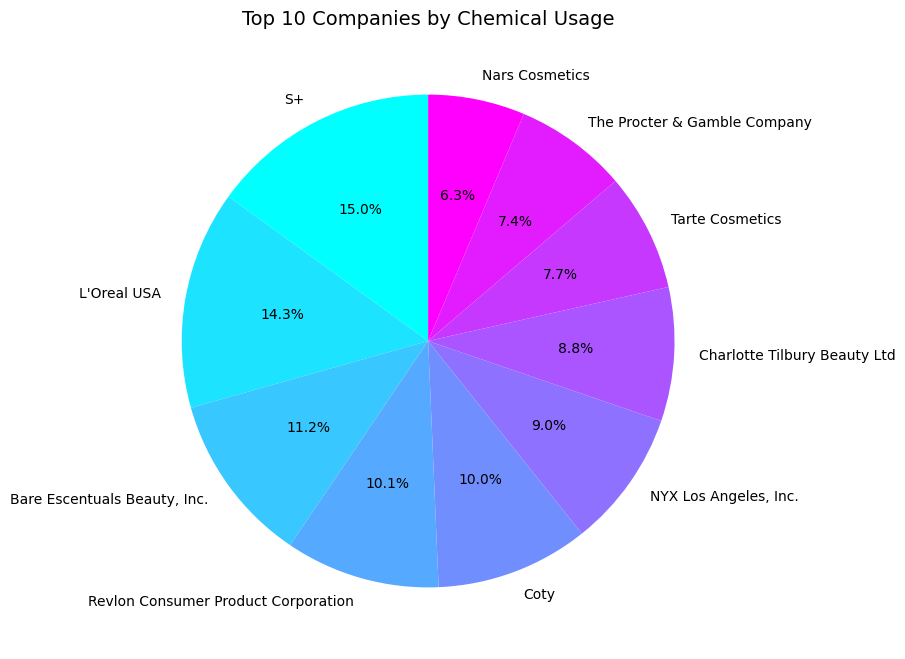

'\n"The pie chart shows the top 10 companies by the number of hazardous chemicals used. "\n"The largest contributors dominate a significant share, emphasizing the need for focused regulatory oversight."\n'

In [42]:
# Pie Chart: Top 10 Companies by Chemical Usage
top_categories = chemcos.groupby('CompanyName')['ChemicalCount_y'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="cool")
plt.title("Top 10 Companies by Chemical Usage", fontsize=14)
plt.ylabel("")
plt.show()

'''
"The pie chart shows the top 10 companies by the number of hazardous chemicals used. "
"The largest contributors dominate a significant share, emphasizing the need for focused regulatory oversight."
'''

In [43]:
# Scatter plot: Chemical Detection by Company

fig = px.scatter(chemcos, x="MostRecentDateReported", y="ChemicalName", title='Chemical Detection', color='CompanyName')
fig.show()

'''
"The scatter plot visualizes the reporting of chemicals by companies over time. "
"Clusters may indicate periods of increased reporting activity, likely due to regulatory changes."
'''

'\n"The scatter plot visualizes the reporting of chemicals by companies over time. "\n"Clusters may indicate periods of increased reporting activity, likely due to regulatory changes."\n'

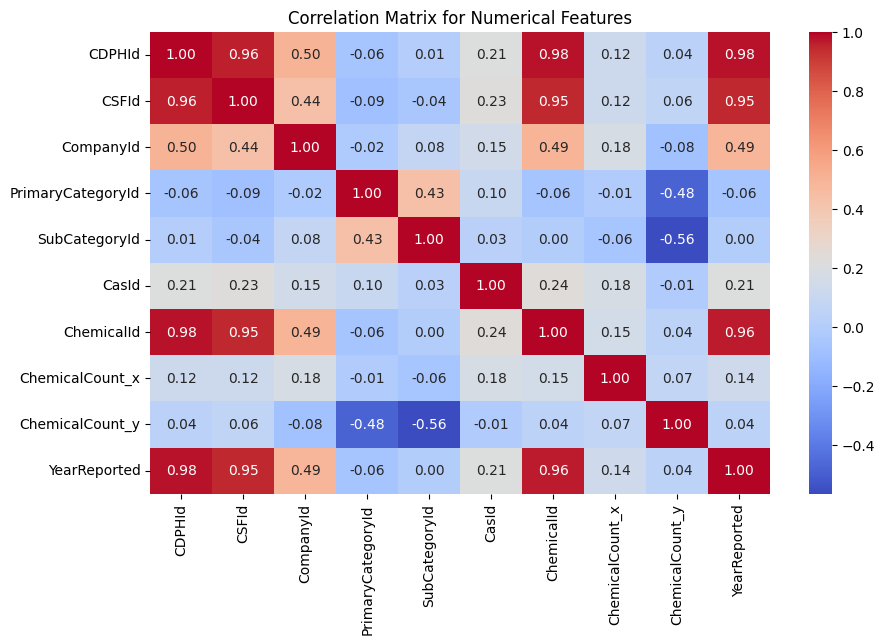

'\n"The correlation matrix reveals the relationships between numerical features in the dataset. "\n"For instance, a strong correlation may exist between chemical count and reporting dates."\n'

In [44]:
# Heatmap: Correlation Matrix for Numerical Features
numeric_data = chemcos.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

'''
"The correlation matrix reveals the relationships between numerical features in the dataset. "
"For instance, a strong correlation may exist between chemical count and reporting dates."
'''

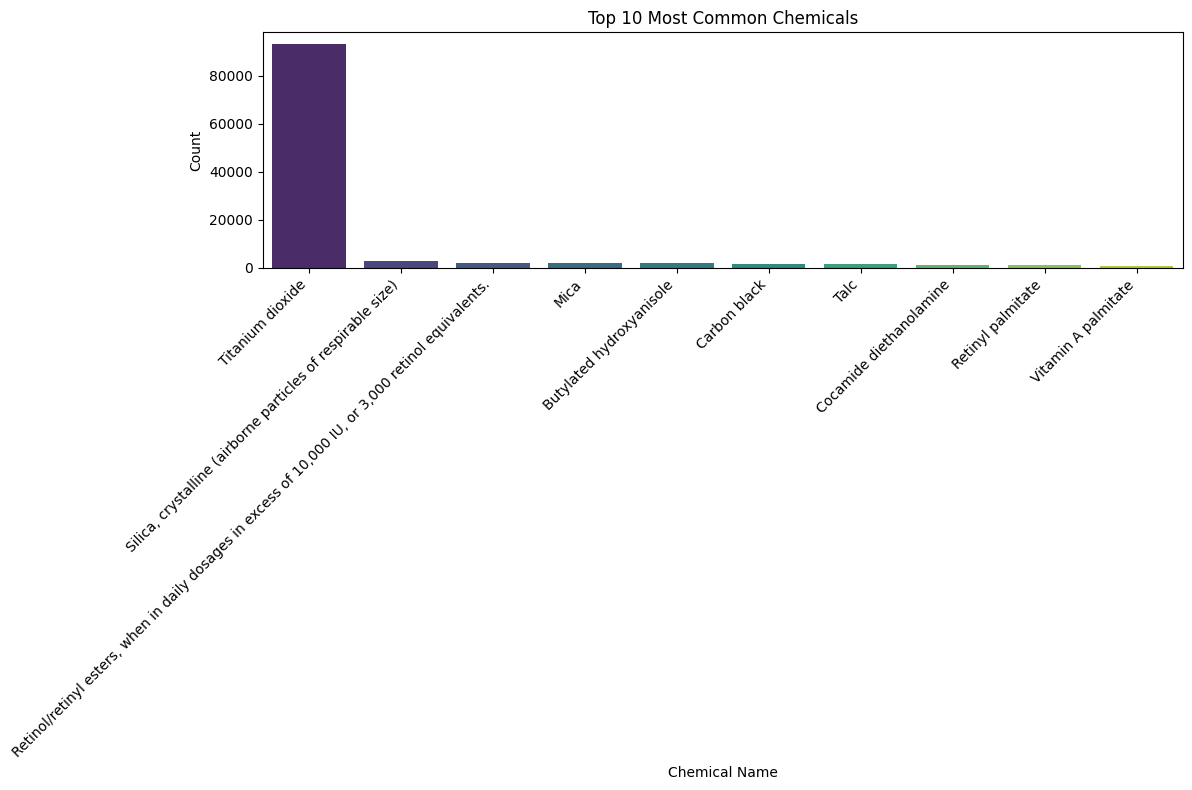

'\n"This bar plot identifies the top 10 most frequently reported hazardous chemicals. "\n"It highlights chemicals that may require more stringent regulation and consumer awareness."\n'

In [45]:
# Bar plot: Top 10 Most Common Chemicals
# Convert the Series to a DataFrame for seaborn
top_chemicals = chemcos['ChemicalName'].value_counts()
top_chemicals = top_chemicals.head(10)

# Converted the Series to a DataFrame for seaborn
top_chemicals_df = top_chemicals.reset_index()
top_chemicals_df.columns = ['ChemicalName', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(
    x='ChemicalName',
    y='Count',
    hue = 'ChemicalName',
    data=top_chemicals_df,
    palette='viridis',
    dodge=False, legend = False
)
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.title('Top 10 Most Common Chemicals')
plt.xlabel('Chemical Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

'''
"This bar plot identifies the top 10 most frequently reported hazardous chemicals. "
"It highlights chemicals that may require more stringent regulation and consumer awareness."
'''

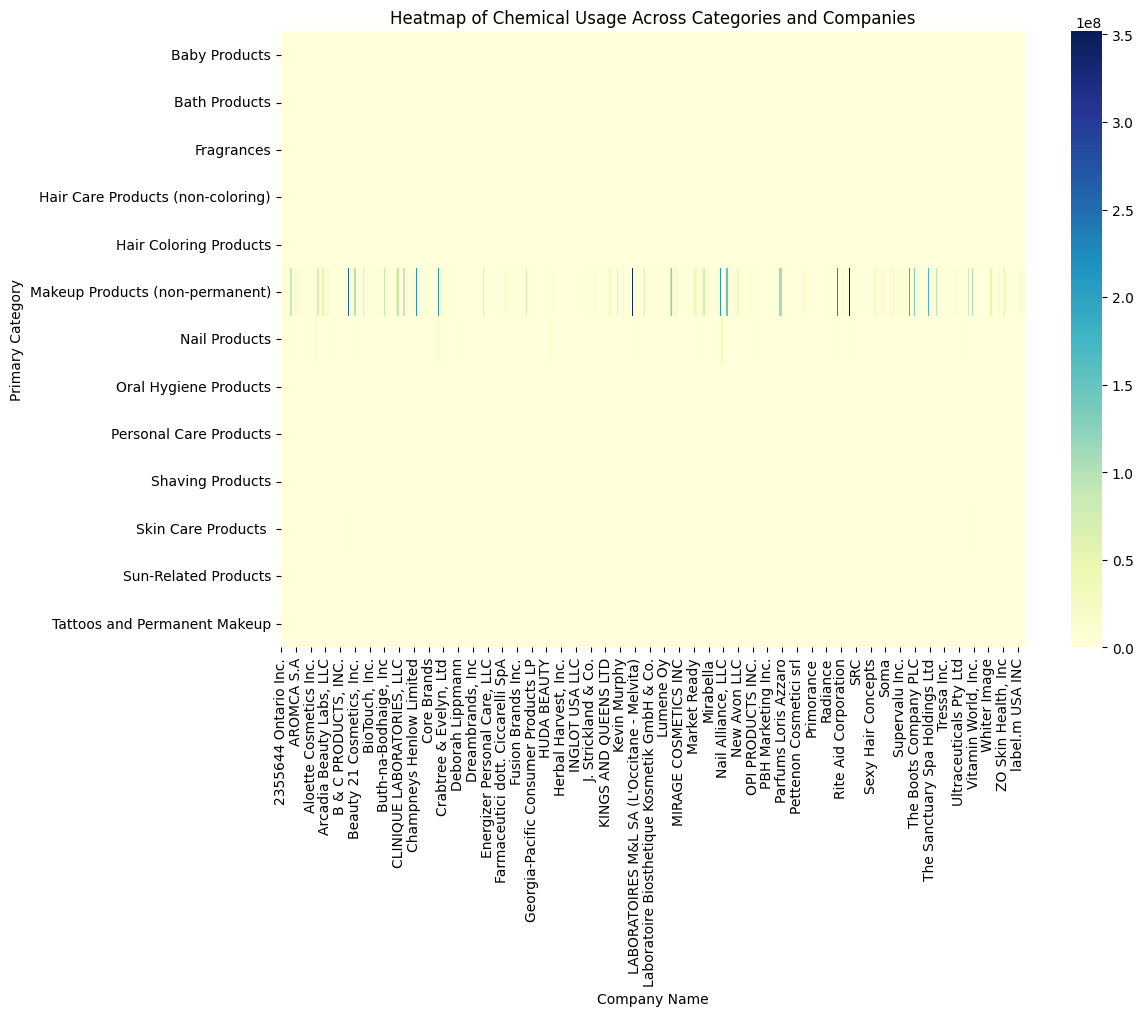

'\n"The heatmap shows the distribution of chemical usage across different categories and companies. "\n"Some companies are concentrated in specific categories, while others have broader activity."\n'

In [46]:
# Heatmap: Chemical Usage Across Categories and Companies
# Create a pivot table for the heatmap data
heatmap_data = chemcos.pivot_table(
    index='PrimaryCategory',
    columns='CompanyName',
    values='ChemicalCount_y',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0 for better visualization
)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap of Chemical Usage Across Categories and Companies")
plt.xlabel("Company Name")
plt.ylabel("Primary Category")
plt.show()

'''
"The heatmap shows the distribution of chemical usage across different categories and companies. "
"Some companies are concentrated in specific categories, while others have broader activity."
'''

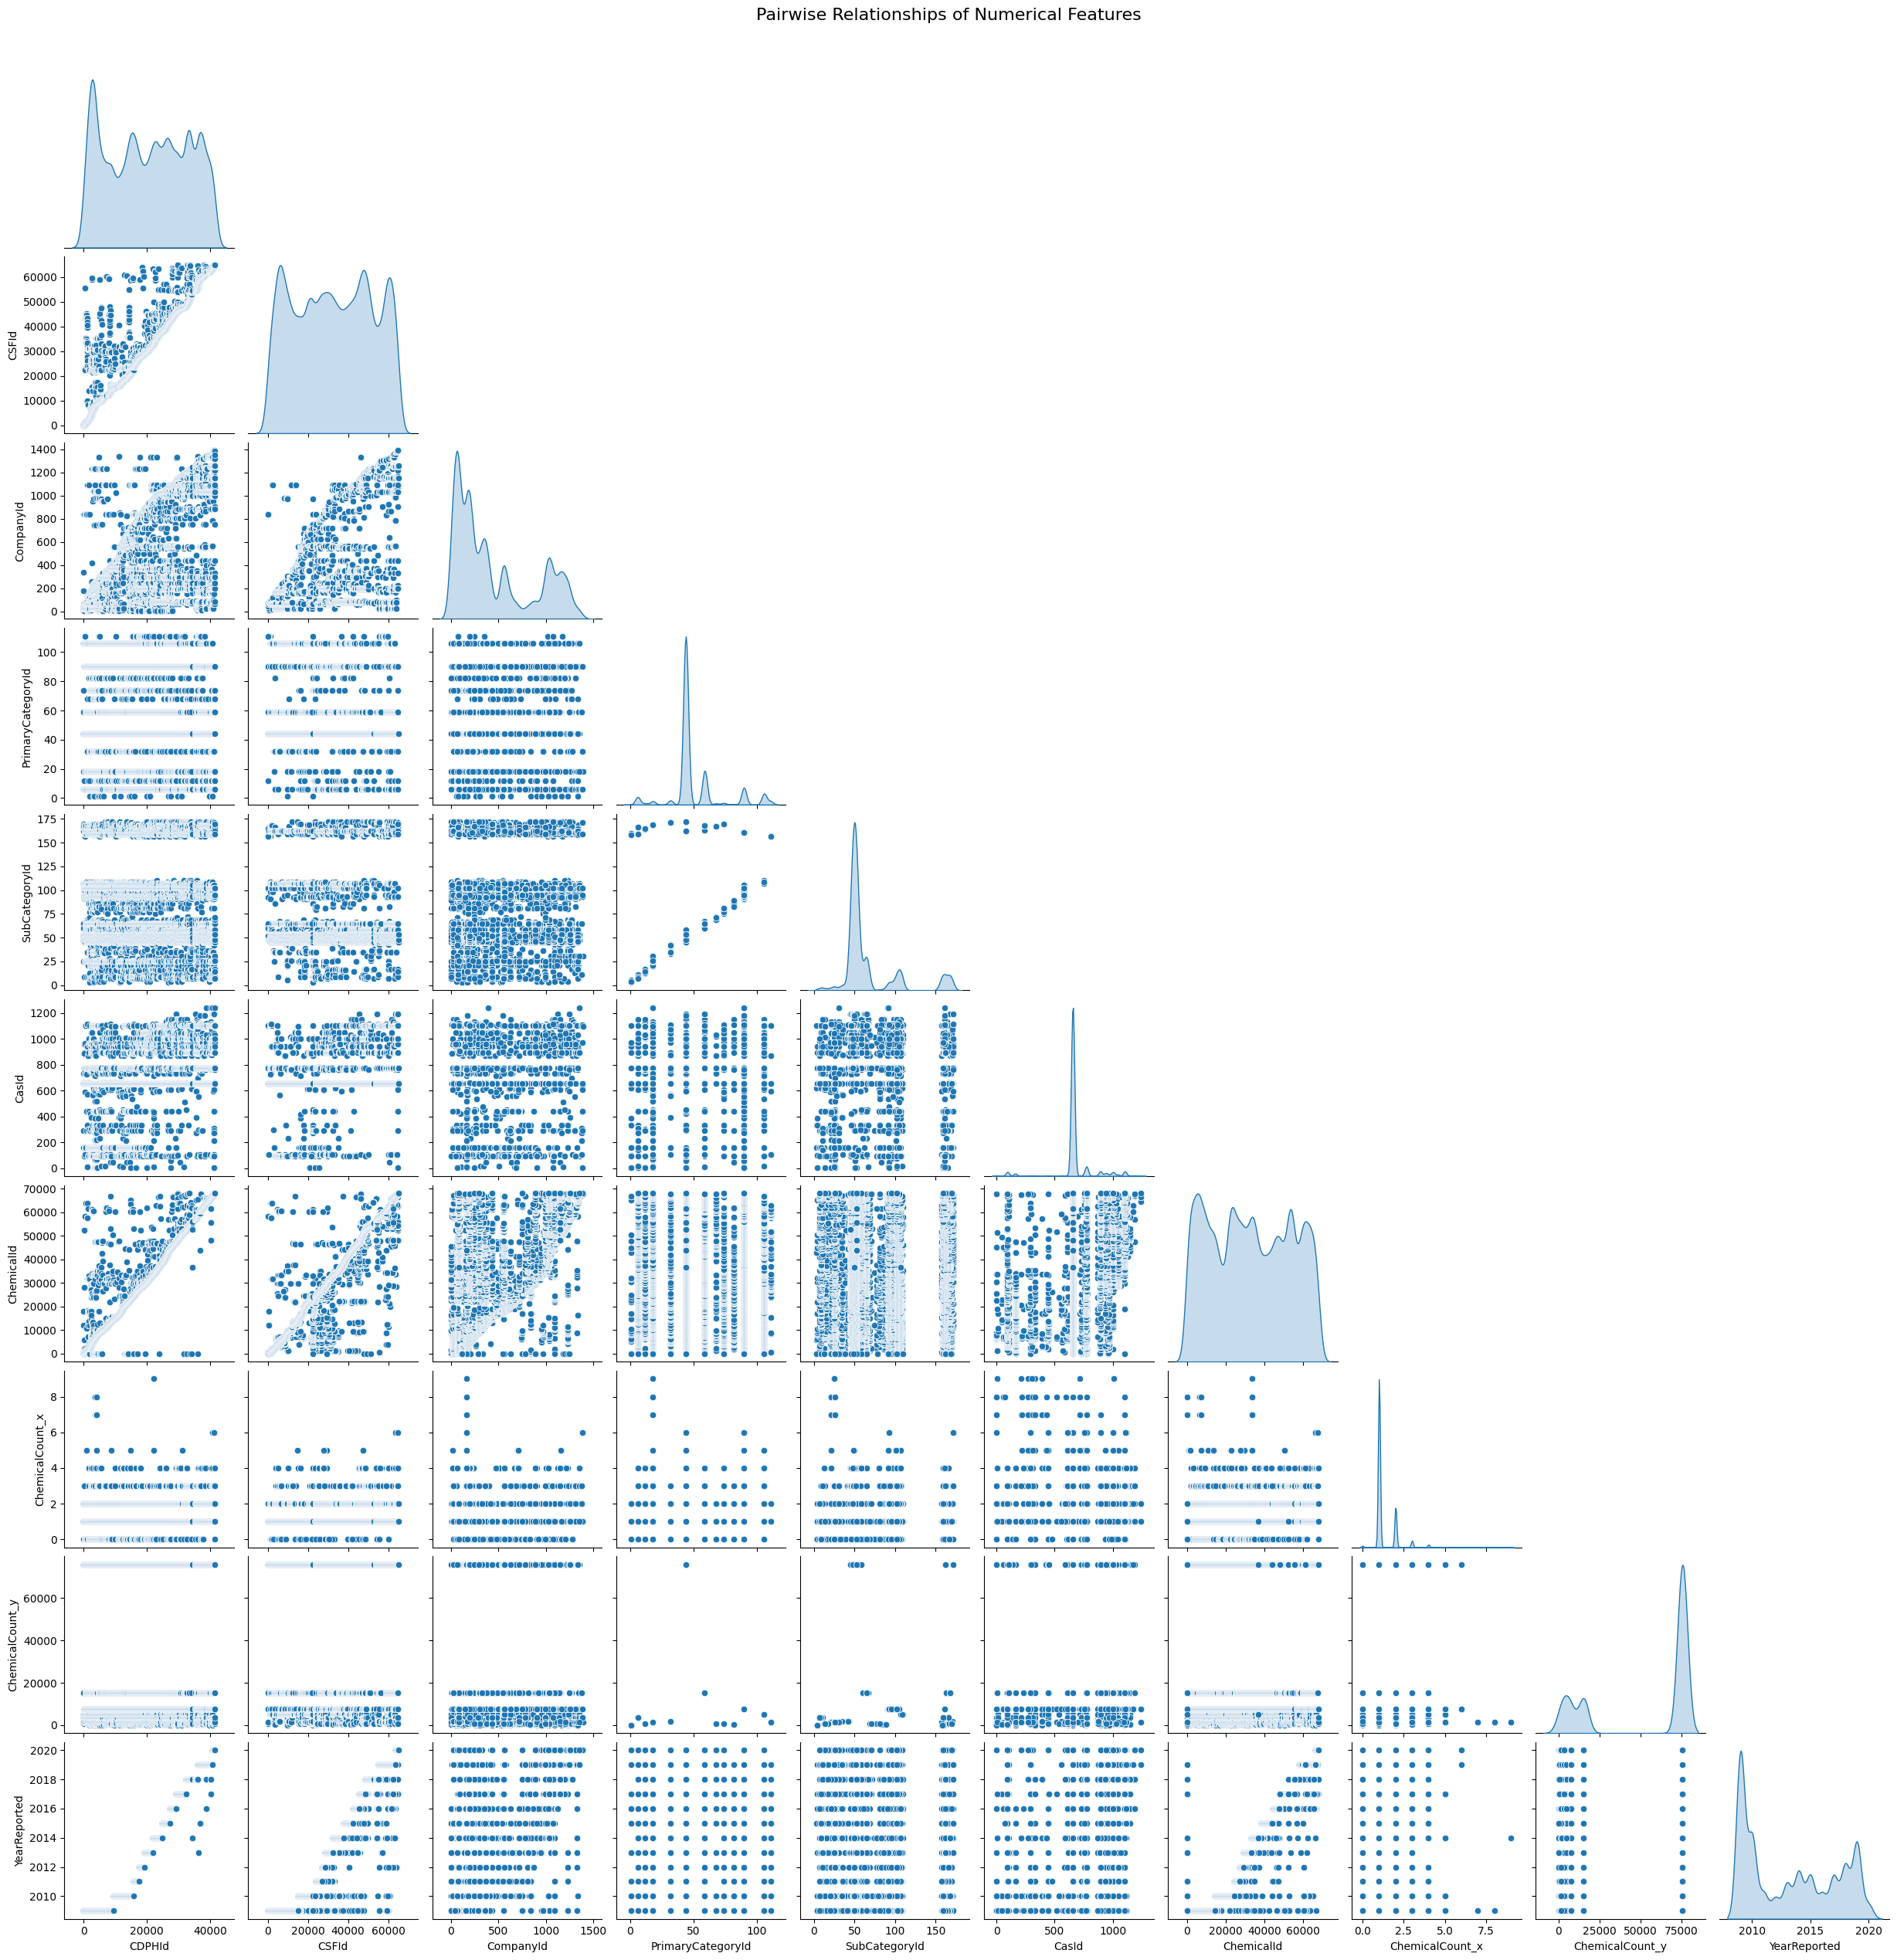

In [47]:
#Pairplot: Pairwise Relationships of Numerical Features

sns.pairplot(numeric_data, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships of Numerical Features", y=1.02, fontsize=16)
plt.show()

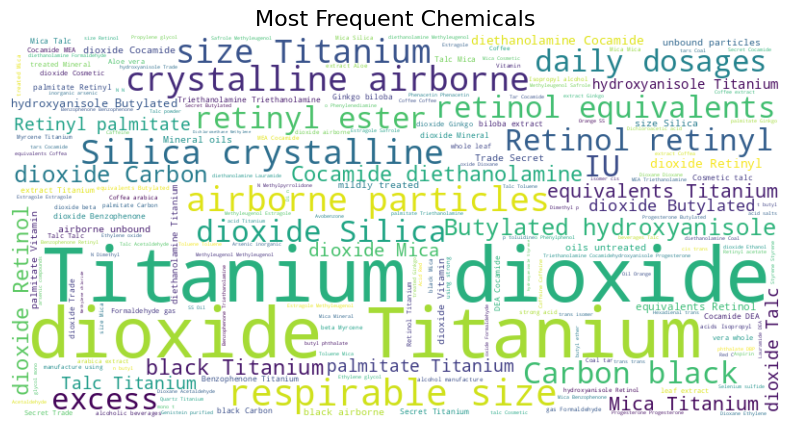

'\n"The word cloud visually represents the most frequently reported hazardous chemicals. "\n"Larger words indicate higher frequency, drawing attention to critical chemicals of concern."\n'

In [48]:
# WordCloud: Most Frequent Chemicals
from wordcloud import WordCloud

# Combine all chemical names into one string
chemical_text = " ".join(chemcos['ChemicalName'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(chemical_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Chemicals", fontsize=16)
plt.show()

'''
"The word cloud visually represents the most frequently reported hazardous chemicals. "
"Larger words indicate higher frequency, drawing attention to critical chemicals of concern."
'''

In [49]:
# Extract the top 3 most common hazardous chemicals
top_3_chemicals = top_chemicals.index[:3].tolist()

# Format the list into a readable string
top_3_chemicals_str = ', '.join(top_3_chemicals)

# Extract the top Company by chemical count
top_Company = chemical_by_Company.iloc[0]['CompanyName']

# Print Key Insights
print("=== Key Insights ===")
print("1. The distribution of hazardous chemicals varies significantly across categories.")
print("2. Top Company contribute heavily to the presence of hazardous chemicals. "
      f"The top Company is {top_Company}.")
print(f"3. The most common hazardous chemicals include {top_3_chemicals_str}.")

=== Key Insights ===
1. The distribution of hazardous chemicals varies significantly across categories.
2. Top Company contribute heavily to the presence of hazardous chemicals. The top Company is L'Oreal USA.
3. The most common hazardous chemicals include Titanium dioxide, Silica, crystalline (airborne particles of respirable size), Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents..
